#Problem Statement

The Lenovo Laptop Service center provides different services to its customers. As and when a job is arrived, it is allocated to an employee, if no job is assigned. Otherwise it is added to pending jobs queue. On completion of job by an employee based on elapsed time in minutes, a job in pending queue is allocated to the corresponding employee.
Assumptions:

1. The service center allows to have a maximum of 10 jobs in the pending queue.

2. An employee is allocated only one job at a time

3. Each job will take a maximum of 1 hr to complete, time needed for completing a job and time elapsed are given in minutes.

Implement the below class diagram based on requirements given:

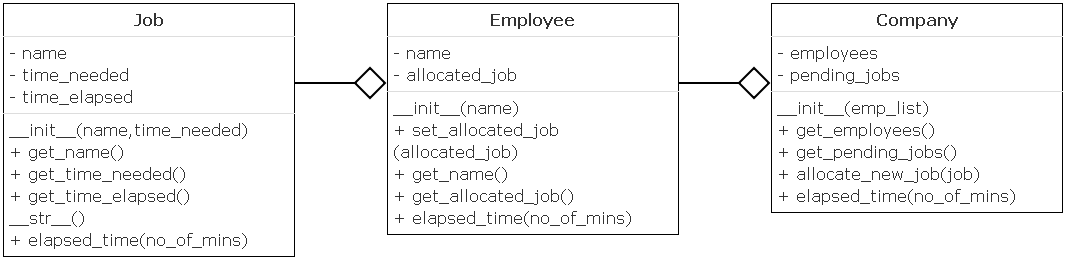

**Job class**

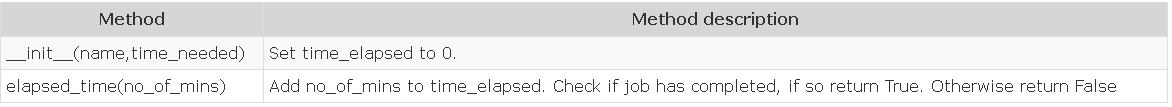

**Employee class**

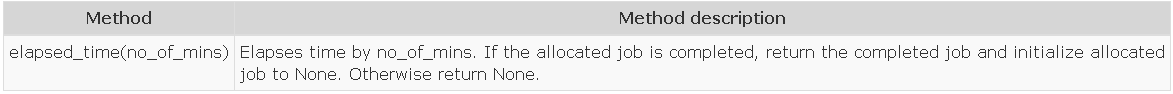

**Company class​​​​​​​**

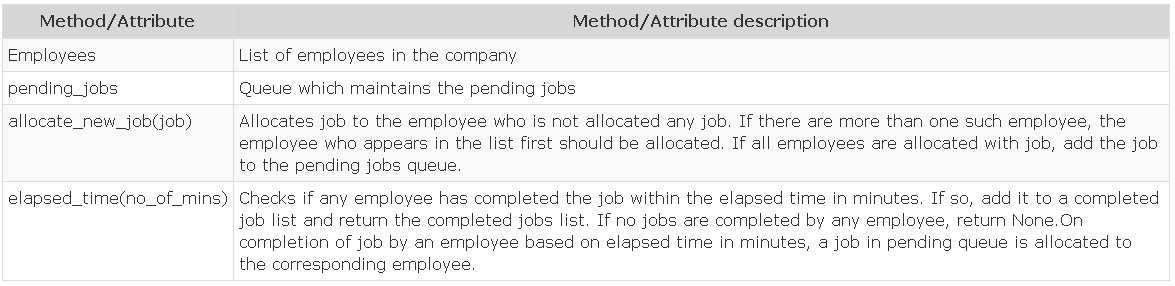

In [ ]:
#lex_auth_0127439130519060481634

class Queue:
    def __init__(self,max_size):

        self.__max_size=max_size
        self.__elements=[None]*self.__max_size
        self.__rear=-1
        self.__front=0

    def is_full(self):
        if(self.__rear==self.__max_size-1):
                return True
        return False

    def is_empty(self):
        if(self.__front>self.__rear):
            return True
        return False

    def enqueue(self,data):
        if(self.is_full()):
            print("Queue is full!!!")
        else:
            self.__rear+=1
            self.__elements[self.__rear]=data

    def dequeue(self):
        if(self.is_empty()):
            print("Queue is empty!!!")
        else:
            data=self.__elements[self.__front]
            self.__front+=1
            return data

    def display(self):
        for index in range(self.__front, self.__rear+1):
            print(self.__elements[index])


    def get_max_size(self):
        return self.__max_size

    #You can use the below __str__() to print the elements of the DS object while debugging
    def __str__(self):
        msg=[]
        index=self.__front
        while(index<=self.__rear):
            msg.append((str)(self.__elements[index]))
            index+=1
        msg=" ".join(msg)
        msg="Queue data(Front to Rear): "+msg
        return msg

#Implement Job, Employee and Company classes here
class Job:
    def __init__(self,name,time_needed):
        self.__name = name
        self.__time_needed = time_needed
        self.__time_elapsed = 0
    def get_name(self):
        return self.__name
    def get_time_needed(self):
        return self.__time_needed
    def get_time_elapsed(self):
        return self.__time_elapsed
    def __str__(self):
        msg = 'Job: ' + self.get_name()
        msg += (' ,Time needed: '+str(self.get_time_needed()))
        msg += (' ,Time elapsed: '+str(self.get_time_elapsed()))
        return msg

    def elapsed_time(self,no_of_mins):
        self.__time_elapsed += no_of_mins
        return self.get_time_elapsed() >= self.get_time_needed()

class Employee:
    def __init__(self,name):
        self.__name = name
        self.__allocated_job = None
    def set_allocated_job(self,allocated_job):
        self.__allocated_job = allocated_job
    def get_name(self):
        return self.__name
    def get_allocated_job(self):
        return self.__allocated_job
    def elapsed_time(self,no_of_mins):
        job_completed = self.get_allocated_job().elapsed_time(no_of_mins)
        if job_completed:
            self.completed_job = self.get_allocated_job()
            self.set_allocated_job(None)
            return self.completed_job

class Company:
    def __init__(self,emp_list):
        self.__employees = emp_list
        self.__pending_jobs = Queue(10)
    def get_employees(self):
        return self.__employees
    def get_pending_jobs(self):
        return self.__pending_jobs
    def allocate_new_job(self,job):
        for emp in self.get_employees():
            if emp.get_allocated_job() == None:
                emp.set_allocated_job(job)
                return
        self.__pending_jobs.enqueue(job)
    def elapsed_time(self,no_of_mins):
        self.__completed_jobs = []
        for emp in self.get_employees():
            job_completed = emp.elapsed_time(no_of_mins)
            if job_completed != None:
                self.__completed_jobs.append(job_completed)
                if not self.get_pending_jobs().is_empty():
                    job = self.get_pending_jobs().dequeue()
                    emp.set_allocated_job(job)
        return self.__completed_jobs if self.__completed_jobs != [] else None

#Change the values and test your programH

emp1=Employee("Ken")
emp2=Employee("Henry")
emp3=Employee("Jack")
emp4=Employee("Hen")
emp5=Employee("Jill")
emp_list=[emp1,emp2,emp3,emp4,emp5]
company=Company(emp_list)
job1=Job("job1",50)
job2=Job("job2",45)
job3=Job("job3",35)
job4=Job("job4",400)
job5=Job("job5",30)
job6=Job("job6",30)
job7=Job("job7",50)
job8=Job("job8",25)
company.allocate_new_job(job1)
company.allocate_new_job(job2)
company.allocate_new_job(job3)
company.allocate_new_job(job4)
company.allocate_new_job(job5)
company.allocate_new_job(job6)
company.allocate_new_job(job7)
company.allocate_new_job(job8)
print("Initial allocation:")
for emp in company.get_employees():
    print(emp.get_name(),"is allocated",emp.get_allocated_job().get_name())
print()
print("Pending Jobs:")
company.get_pending_jobs().display()
print()
completed_jobs=company.elapsed_time(30)
print("Completed Jobs :")
for job in completed_jobs:
    print(job.get_name())
print()
print("After completion:")
for emp in company.get_employees():
    print(emp.get_name(),"needs", emp.get_allocated_job().get_time_needed()-emp.get_allocated_job().get_time_elapsed(),"more minutes for",emp.get_allocated_job().get_name())
print()
print("Pending Jobs:")
company.get_pending_jobs().display()
print()
completed_jobs=company.elapsed_time(10)
print("After completion:")
for emp in company.get_employees():
    print(emp.get_name(),"needs", emp.get_allocated_job().get_time_needed()-emp.get_allocated_job().get_time_elapsed(),"more minutes for",emp.get_allocated_job().get_name())
print()
print("Pending Jobs:")
company.get_pending_jobs().display()